In [0]:
 from google.colab import drive

In [59]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [60]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
X_train=

['dog.100.jpg', 'dog.10.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg', 'dog.107.jpg', 'dog.108.jpg', 'dog.109.jpg', 'dog.11.jpg', 'dog.110.jpg', 'dog.111.jpg', 'dog.112.jpg', 'dog.113.jpg', 'dog.114.jpg', 'dog.115.jpg', 'dog.116.jpg', 'dog.117.jpg', 'dog.118.jpg', 'dog.119.jpg', 'dog.120.jpg', 'dog.12.jpg', 'dog.121.jpg', 'dog.122.jpg', 'dog.123.jpg', 'dog.124.jpg', 'dog.125.jpg', 'dog.126.jpg', 'dog.128.jpg', 'dog.127.jpg', 'dog.129.jpg', 'dog.13.jpg', 'dog.130.jpg', 'dog.131.jpg', 'dog.133.jpg', 'dog.134.jpg', 'dog.132.jpg', 'dog.140.jpg', 'dog.137.jpg', 'dog.138.jpg', 'dog.135.jpg', 'dog.14.jpg', 'dog.139.jpg', 'dog.136.jpg', 'dog.142.jpg', 'dog.143.jpg', 'dog.141.jpg', 'dog.144.jpg', 'dog.145.jpg', 'dog.146.jpg', 'dog.150.jpg', 'dog.147.jpg', 'dog.148.jpg', 'dog.149.jpg', 'dog.151.jpg', 'dog.15.jpg', 'dog.154.jpg', 'dog.153.jpg', 'dog.156.jpg', 'dog.155.jpg', 'dog.152.jpg', 'dog.158.jpg', 'dog.160.jpg', 'dog.157.jpg', 'dog.159.jpg', 

In [0]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [0]:
filenames = os.listdir("/content/gdrive/My Drive/cat-dog")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [64]:
df.head()

,filename,category
0,dog.100.jpg,1
1,dog.10.jpg,1
2,dog.101.jpg,1
3,dog.102.jpg,1
4,dog.103.jpg,1


In [65]:
df.tail()

,filename,category
808,cat.95.jpg,0
809,cat.96.jpg,0
810,cat.97.jpg,0
811,cat.98.jpg,0
812,cat.99.jpg,0


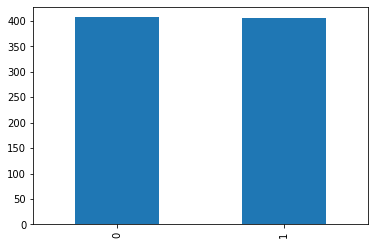

In [66]:
df['category'].value_counts().plot.bar()

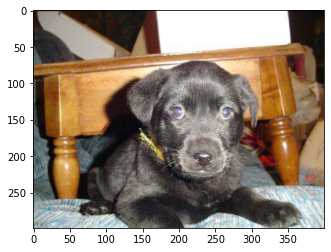

In [88]:
sample = random.choice(filenames)
image = load_img(r"/content/gdrive/My Drive/cat-dog/"+sample)
plt.imshow(image)

In [87]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['/content/gdrive/My Drive/cat-dog'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)       

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [0]:
earlystop = EarlyStopping(patience=10)

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
callbacks = [earlystop, learning_rate_reduction]


In [0]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

In [0]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

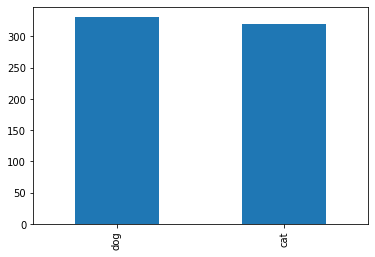

In [80]:
train_df['category'].value_counts().plot.bar()

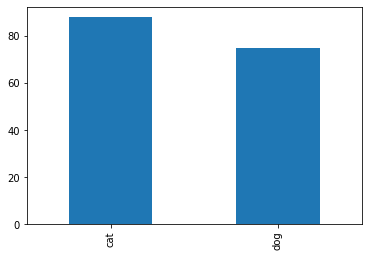

In [81]:
validate_df['category'].value_counts().plot.bar()

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [84]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/gdrive/My Drive/cat-dog/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 650 validated image filenames belonging to 2 classes.


In [89]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/gdrive/My Drive/cat-dog/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 163 validated image filenames belonging to 2 classes.


In [90]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/content/gdrive/My Drive/cat-dog/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)


Found 1 validated image filenames belonging to 1 classes.


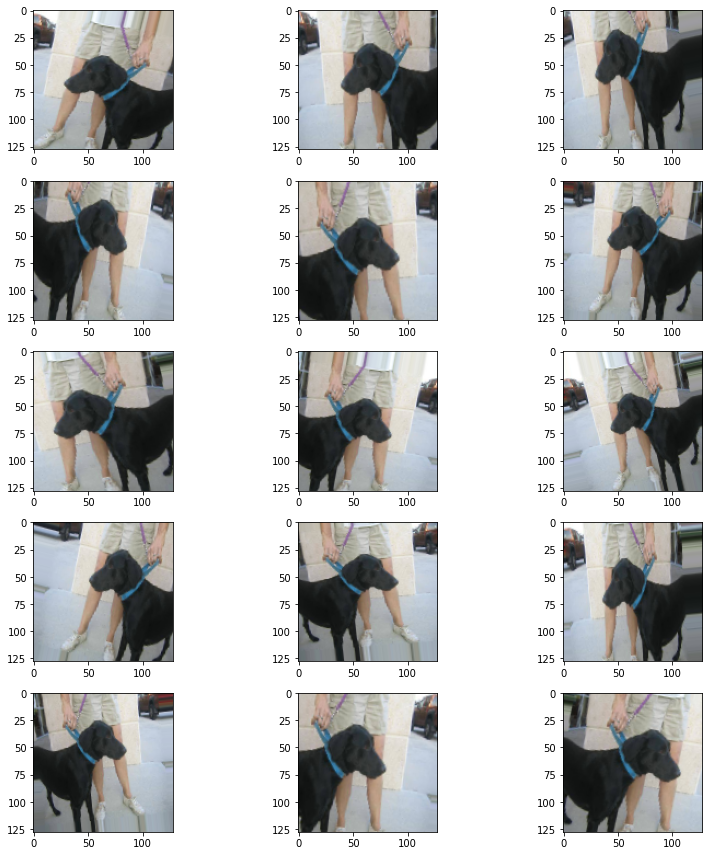

In [91]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [92]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
43/43 [==============================] - 36s 835ms/step - loss: 1.6120 - accuracy: 0.5606 - val_loss: 0.4846 - val_accuracy: 0.5467
Epoch 2/50


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


43/43 [==============================] - 35s 821ms/step - loss: 1.1255 - accuracy: 0.6094 - val_loss: 0.6390 - val_accuracy: 0.5743
Epoch 3/50
43/43 [==============================] - 36s 832ms/step - loss: 1.1529 - accuracy: 0.5643 - val_loss: 0.9205 - val_accuracy: 0.4257
Epoch 4/50
43/43 [==============================] - 35s 813ms/step - loss: 0.8633 - accuracy: 0.6304 - val_loss: 0.8059 - val_accuracy: 0.4527
Epoch 5/50
43/43 [==============================] - 35s 823ms/step - loss: 0.9356 - accuracy: 0.5843 - val_loss: 0.7295 - val_accuracy: 0.4459
Epoch 6/50
43/43 [==============================] - 35s 822ms/step - loss: 0.8329 - accuracy: 0.5984 - val_loss: 0.7139 - val_accuracy: 0.5338
Epoch 7/50
43/43 [==============================] - 35s 824ms/step - loss: 0.8497 - accuracy: 0.6248 - val_loss: 1.2873 - val_accuracy: 0.5000
Epoch 8/50
43/43 [==============================] - 35s 823ms/step - loss: 0.7298 - accuracy: 0.6368 - val_loss: 0.7229 - val_accuracy: 0.6081
Epoch 9/50

In [0]:
model.save_weights("model.h5")

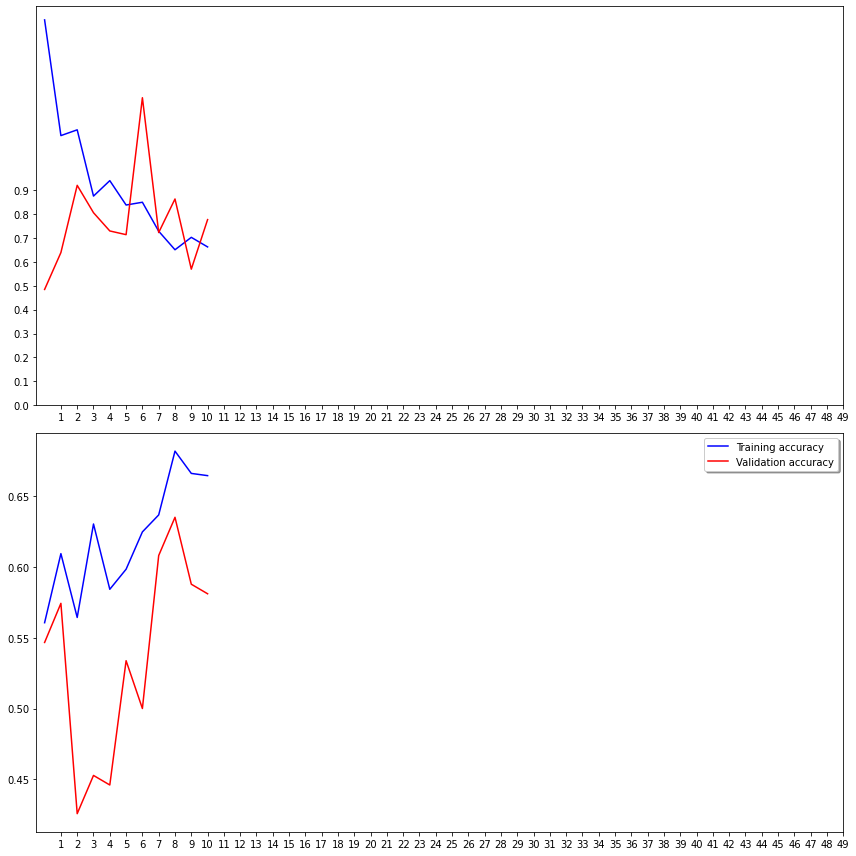

In [106]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [0]:
test_filenames = os.listdir("/content/gdrive/My Drive/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [96]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/gdrive/My Drive/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 169 validated image filenames.


In [0]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [0]:
test_df['category'] = np.argmax(predict, axis=-1)

In [0]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [0]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

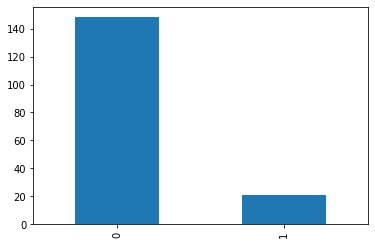

In [101]:
test_df['category'].value_counts().plot.bar()

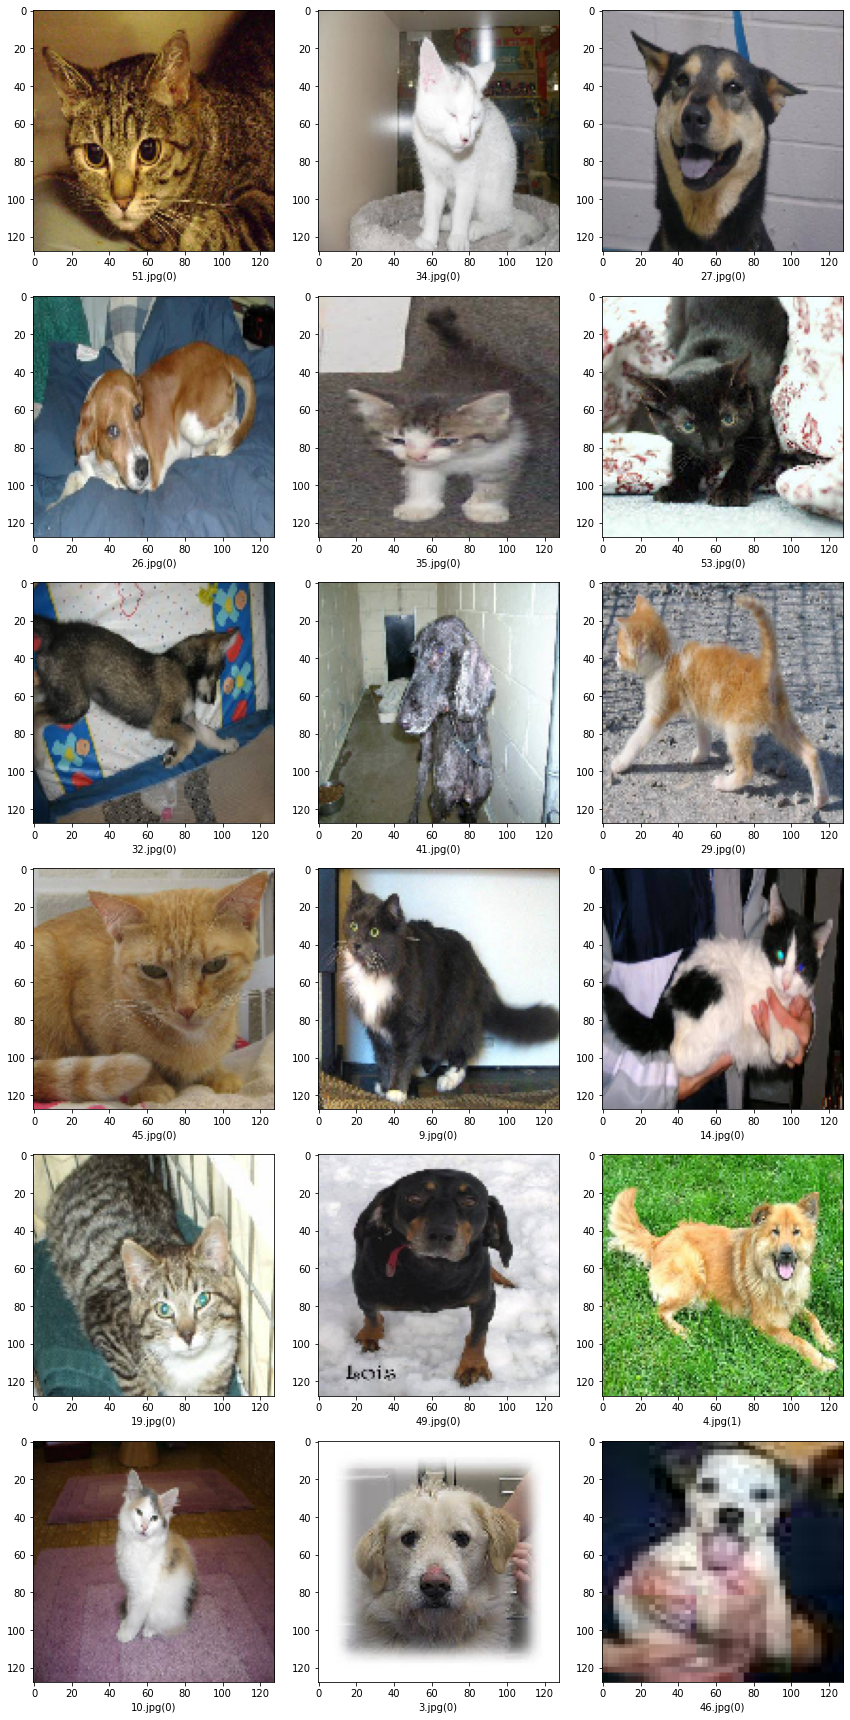

In [103]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/gdrive/My Drive/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()